In [1]:
#------------------------------------------------------------------------
# FUNCAO QUE MONTA O CIRCUITO DA QFT DE 'n' QUBITS:
#------------------------------------------------------------------------
def QFT(n):
    from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
#------------------------------
    Q  = QuantumRegister(  n, name = 'j')
    C  = ClassicalRegister(n, name = 'c')
    QC = QuantumCircuit(Q, C, name = "QFT")
#------------------------------
    for i in range(0, n):
        m = n - 1 - i
        QC.h(Q[m])
        for j in range(m, 0, -1):
            k = 2 + m - j
            Rk(QC, Q[j-1], Q[m], k, 1.0)
        QC.barrier()
#------------------------------
# PORTA SWAP:
#------------------------------
    j = 0
    while ( int(n/2) > j ):
        QC.swap( Q[j], Q[n-1 - j] )
        j = j + 1
#------------------------------
    QC.barrier()
    QC.measure(Q, C)
    print(' QFT(): FUNCIONA')
#------------------------------
    return QC
#------------------------------------------------------------------------
# FUNCAO QUE DEFINE A PORTA Rk USANDO A PORTA cu1:
#------------------------------------------------------------------------
def Rk(QC, Q_CONTROL, Q_TARGET, k, a):
    import math as MT; PI = MT.pi
    QC.cu1( a*2.0*PI/2.0**k, Q_CONTROL, Q_TARGET)
    return None

In [2]:
#------------------------------------------------------------------------
# FUNCAO QUE EXECUTA O CIRCUITO NA MAQUINA LOCAL:
#------------------------------------------------------------------------
def SIMULADOR_LOCAL(QC, N_SHOTS, BACKEND_NAME):
    from qiskit  import Aer
    from qiskit  import execute
#--------------
    F_NAME = '\'SIMULADOR_LOCAL()\''
    BACKEND = Aer.get_backend(BACKEND_NAME)
#-----------------------------------------------------------------------
    EXP = execute(QC, BACKEND, shots=N_SHOTS)
    RESULT = EXP.result()
    print(' RESULTS:')
#   print('   EXP.result():', RESULT); # <-- IMPRIMI UM MONTE DE COISAS
    print('   backend_name:', RESULT.backend_name, end =' |')
    print('   status:',       RESULT.status, end =' |')
    print('   success:',      RESULT.success)
#   print('   data:',         RESULT.data); <-- IMPRIMI UM MONTE DE COISAS
    print('   get_counts():', RESULT.get_counts() )
#-----------------------------------------------------------------------
    print(' ---------- FIM DA FUNCAO %s---------- '% F_NAME)
    return RESULT.get_counts()

In [14]:
#------------------------------------------------------------------------
# FUNCAO PARA CRIAR O HISTOGRAMA:
#------------------------------------------------------------------------
def PLOT_HISTOGRAMS( DATA ):
    from qiskit.tools.visualization import plot_histogram, iplot_histogram
    BAR_LABELS = True # <-- MOSTRAR AS PROBABILIDADES ACIMA DAS BARRAS DO HISTOGRAMA
    HIST = plot_histogram( DATA, bar_labels = BAR_LABELS, figsize = (25, 5) )
    display(HIST)
    return None

In [15]:
n = 3 # <-- DEFININDO O NUMERO DE QUBITS
QC_QFT = QFT(n)

 QFT(): FUNCIONA


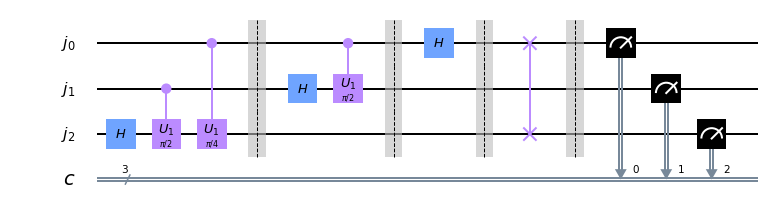

In [16]:
display( QC_QFT.draw(output='mpl'))

In [17]:
#------------------------------------------------------------------------
# SIMULANDO O CIRCUITO:
#------------------------------------------------------------------------
N_SHOTS = 2**(13)
BACKEND_NAME = "qasm_simulator"

DADOS_0 = SIMULADOR_LOCAL(QC_QFT, N_SHOTS, BACKEND_NAME)

 RESULTS:
   backend_name: qasm_simulator |   status: COMPLETED |   success: True
   get_counts(): {'011': 1024, '111': 1027, '101': 994, '000': 1037, '100': 1056, '001': 1014, '010': 1016, '110': 1024}
 ---------- FIM DA FUNCAO 'SIMULADOR_LOCAL()'---------- 


In [18]:
import matplotlib.pyplot as plt
from qiskit.tools.visualization import plot_histogram

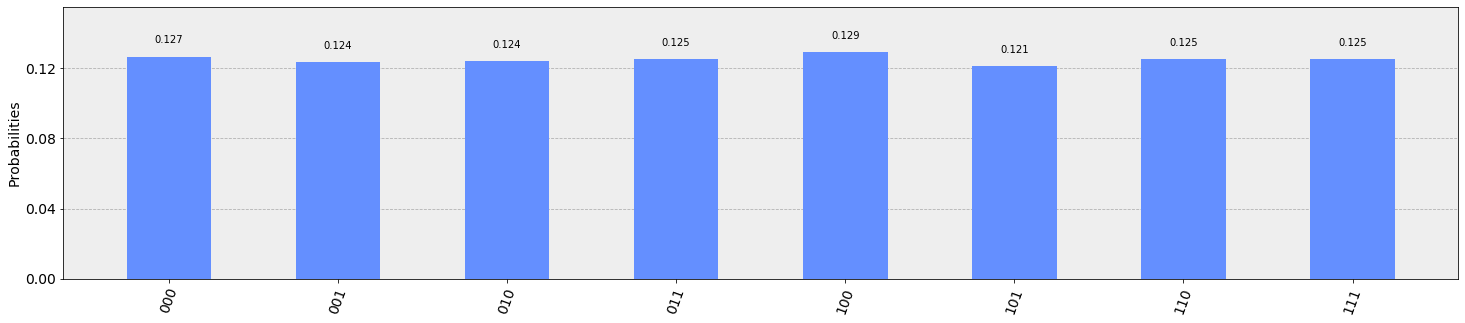

In [20]:
PLOT_HISTOGRAMS( [DADOS_0])

In [21]:
fig = plot_histogram( [DADOS_0], bar_labels = False, color='blue', figsize = (10, 7) );
ax = fig.axes[0]
ax.patch.set_facecolor('white')
ax.patch.set_alpha(0.5)
ax.patch.set_edgecolor('black')
ax.set_ylabel('Probabilidades', fontsize=26)
ax.set_yticklabels([0.00, 0.04, 0.08, 0.12], fontsize=20)
ax.set_xticklabels([r'$\left\vert000\right\rangle$', r'$\left\vert001\right\rangle$', r'$\left\vert010\right\rangle$', r'$\left\vert011\right\rangle$', r'$\left\vert100\right\rangle$', r'$\left\vert101\right\rangle$', r'$\left\vert110\right\rangle$', r'$\left\vert111\right\rangle$'], fontsize=20)
fig.savefig('Hist_QC_QFT_3qubit.png')

In [10]:
#------------------------------------------------------------------------
# FUNCAO PARA SE REGISTRAR NA IBM:
#------------------------------------------------------------------------
def CHIP_REGISTER():
    from qiskit import IBMQ
#−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−
    # Você pode obter o seu token em:
    # https://quantum-computing.ibm.com/
    QX_TOKEN = "cole seu token aqui"
    QX_URL = "https://quantumexperience.ng.bluemix.net/api"
#−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−
    try :
        IBMQ.save_account(QX_TOKEN)
        print('Registado com sucesso!')
    except :
        print('Algo deu errado. \nVocê inseriu o token correto?')
    return None
#-----------------------------------------------------------------------
CHIP_REGISTER()

 CHIP_REGISTER() DIZ:
 REGISTER OK


In [11]:
#------------------------------------------------------------------------
# FUNCAO QUE EXECUTA O CIRCUITO NA MAQUINA REMOTA:
#------------------------------------------------------------------------
def SIMULADOR_REMOTO(QC, N_SHOTS, BACKEND_NAME):
    from qiskit               import IBMQ;
    from qiskit               import execute;
    from qiskit.tools.monitor import job_monitor;
#--------------
    F_NAME = '\'SIMULADOR_REMOTO()\''
    BACKEND = IBMQ.get_backend(BACKEND_NAME)
# METODO NOVO:
#   PROVIDER = IBMQ.load_account()
#   PROVIDER = IBMQ.enable_account('MY_API_TOKEN')
#   BACKEND  = PROVIDER.get_backend(BACKEND_NAME)
#--------------
    STATUS  = BACKEND.status()
    if( STATUS.operational == False ):
        print(' FUNCAO %s DIZ:'% F_NAME )
        print(' ESTE BACKEND NAO ESTA OPERACIONAL NO MOMENTO, VEJA:')
        print("    STATUS.operational =",  STATUS)
        print(' ENCERRANDO')
        return None
#-----------------------------------------------------------------------
    EXP = execute(QC, BACKEND, shots=N_SHOTS)
    job_monitor(EXP, interval = 5)

    RESULT = EXP.result()
    print(' RESULTS:')
    print('   backend_name:', RESULT.backend_name, end =' | ')
    print('   status:',       RESULT.status, end =' | ')
    print('   success:',      RESULT.success)
    print('   get_counts():', RESULT.get_counts() )
#-----------------------------------------------------------------------
    print(' ---------- FIM DA FUNCAO %s---------- '% F_NAME)
    return RESULT.get_counts()

In [12]:
# EXECUTANDO O CIRCUITO COM ESTADO INICIAL: 000
N_SHOTS = 2**(13);

BACKEND_NAME = "ibmqx2";              DADOS_ibmqx2 = SIMULADOR_REMOTO(QC_QFT, N_SHOTS, BACKEND_NAME);
BACKEND_NAME = "ibmq_ourense";        DADOS_ibmq_ourense = SIMULADOR_REMOTO(QC_QFT, N_SHOTS, BACKEND_NAME);
BACKEND_NAME = "ibmq_16_melbourne";   DADOS_ibmq_16_melbourne = SIMULADOR_REMOTO(QC_QFT, N_SHOTS, BACKEND_NAME);


/home/warley/anaconda3/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:594: DeprecationWarning: IBMQ.get_backend() is being deprecated. Please use IBMQ.get_provider() to retrieve a provider and AccountProvider.get_backend("name") to retrieve a backend.
  DeprecationWarning)


Job Status: job has successfully run
 RESULTS:
   backend_name: ibmqx2 |   status: Successful completion |   success: True
   get_counts(): {'011': 1180, '111': 1115, '101': 1024, '000': 1135, '100': 727, '001': 1388, '010': 912, '110': 711}
 ---------- FIM DA FUNCAO 'SIMULADOR_REMOTO()'---------- 


/home/warley/anaconda3/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:594: DeprecationWarning: IBMQ.get_backend() is being deprecated. Please use IBMQ.get_provider() to retrieve a provider and AccountProvider.get_backend("name") to retrieve a backend.
  DeprecationWarning)


Job Status: job has successfully run
 RESULTS:
   backend_name: ibmq_ourense |   status: Successful completion |   success: True
   get_counts(): {'011': 725, '111': 765, '101': 1407, '000': 890, '100': 1142, '001': 853, '010': 1281, '110': 1129}
 ---------- FIM DA FUNCAO 'SIMULADOR_REMOTO()'---------- 


/home/warley/anaconda3/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:594: DeprecationWarning: IBMQ.get_backend() is being deprecated. Please use IBMQ.get_provider() to retrieve a provider and AccountProvider.get_backend("name") to retrieve a backend.
  DeprecationWarning)


Job Status: job has successfully run
 RESULTS:
   backend_name: ibmq_16_melbourne |   status: Successful completion |   success: True
   get_counts(): {'011': 812, '111': 1013, '101': 922, '000': 1071, '100': 1252, '001': 602, '010': 1077, '110': 1443}
 ---------- FIM DA FUNCAO 'SIMULADOR_REMOTO()'---------- 


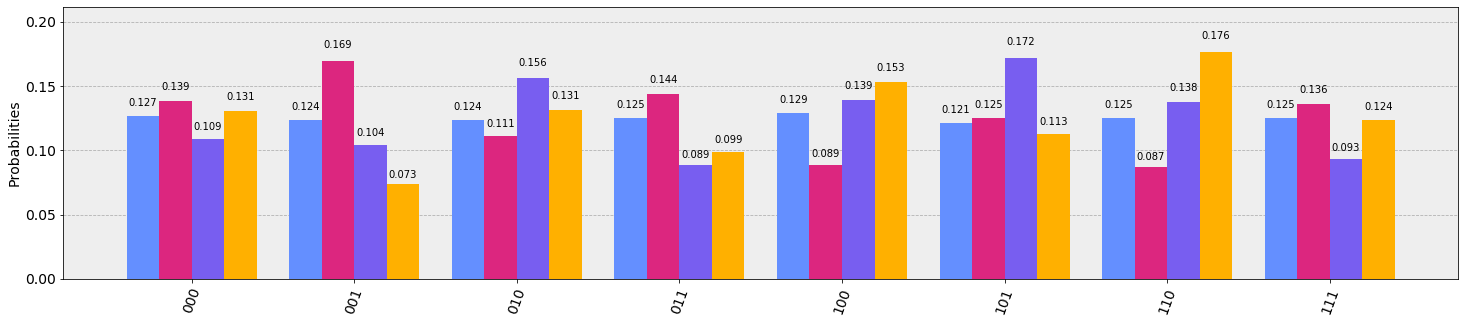

In [22]:
PLOT_HISTOGRAMS( [DADOS_0, DADOS_ibmqx2, DADOS_ibmq_ourense, DADOS_ibmq_16_melbourne] )

In [23]:
fig = plot_histogram( [DADOS_0, DADOS_ibmqx2, DADOS_ibmq_ourense, DADOS_ibmq_16_melbourne], bar_labels = False, color= ['blue','red','green','gray'], figsize = (10, 7) );
ax = fig.axes[0]
ax.patch.set_facecolor('white')
ax.patch.set_alpha(0.5)
ax.patch.set_edgecolor('black')
ax.set_ylabel('Probabilidades', fontsize=26)
ax.set_yticklabels([0.00, 0.05, 0.10, 0.15, 0.20], fontsize=20)
ax.set_xticklabels([r'$\left\vert000\right\rangle$', r'$\left\vert001\right\rangle$', r'$\left\vert010\right\rangle$', r'$\left\vert011\right\rangle$', r'$\left\vert100\right\rangle$', r'$\left\vert101\right\rangle$', r'$\left\vert110\right\rangle$', r'$\left\vert111\right\rangle$'], fontsize=20)
fig.savefig('Hist1_IBMQ_QC_QFT_3qubit.png')

In [24]:
#------------------------------------------------------------------------
# SIMULANDO O CIRCUITO:
#------------------------------------------------------------------------
N_SHOTS = 2**(13);
BACKEND_NAME = "qasm_simulator";      DADOS_01 = SIMULADOR_LOCAL(QC_QFT, N_SHOTS, BACKEND_NAME);
BACKEND_NAME = "ibmqx2";              DADOS_ibmqx21 = SIMULADOR_REMOTO(QC_QFT, N_SHOTS, BACKEND_NAME);
BACKEND_NAME = "ibmq_ourense";        DADOS_ibmq_ourense1 = SIMULADOR_REMOTO(QC_QFT, N_SHOTS, BACKEND_NAME);
BACKEND_NAME = "ibmq_16_melbourne";   DADOS_ibmq_16_melbourne1 = SIMULADOR_REMOTO(QC_QFT, N_SHOTS, BACKEND_NAME);


 RESULTS:
   backend_name: qasm_simulator |   status: COMPLETED |   success: True
   get_counts(): {'011': 1056, '111': 1015, '101': 996, '000': 1032, '100': 1048, '001': 1006, '010': 1003, '110': 1036}
 ---------- FIM DA FUNCAO 'SIMULADOR_LOCAL()'---------- 


/home/warley/anaconda3/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:594: DeprecationWarning: IBMQ.get_backend() is being deprecated. Please use IBMQ.get_provider() to retrieve a provider and AccountProvider.get_backend("name") to retrieve a backend.
  DeprecationWarning)


Job Status: job has successfully run
 RESULTS:
   backend_name: ibmqx2 |   status: Successful completion |   success: True
   get_counts(): {'011': 1271, '111': 1127, '101': 1065, '000': 1137, '100': 718, '001': 1453, '010': 752, '110': 669}
 ---------- FIM DA FUNCAO 'SIMULADOR_REMOTO()'---------- 


/home/warley/anaconda3/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:594: DeprecationWarning: IBMQ.get_backend() is being deprecated. Please use IBMQ.get_provider() to retrieve a provider and AccountProvider.get_backend("name") to retrieve a backend.
  DeprecationWarning)


Job Status: job has successfully run
 RESULTS:
   backend_name: ibmq_ourense |   status: Successful completion |   success: True
   get_counts(): {'011': 471, '111': 830, '101': 885, '000': 1374, '100': 883, '001': 978, '010': 1208, '110': 1563}
 ---------- FIM DA FUNCAO 'SIMULADOR_REMOTO()'---------- 


/home/warley/anaconda3/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:594: DeprecationWarning: IBMQ.get_backend() is being deprecated. Please use IBMQ.get_provider() to retrieve a provider and AccountProvider.get_backend("name") to retrieve a backend.
  DeprecationWarning)


Job Status: job has successfully run
 RESULTS:
   backend_name: ibmq_16_melbourne |   status: Successful completion |   success: True
   get_counts(): {'011': 643, '111': 835, '101': 593, '000': 1543, '100': 1188, '001': 667, '010': 1207, '110': 1516}
 ---------- FIM DA FUNCAO 'SIMULADOR_REMOTO()'---------- 


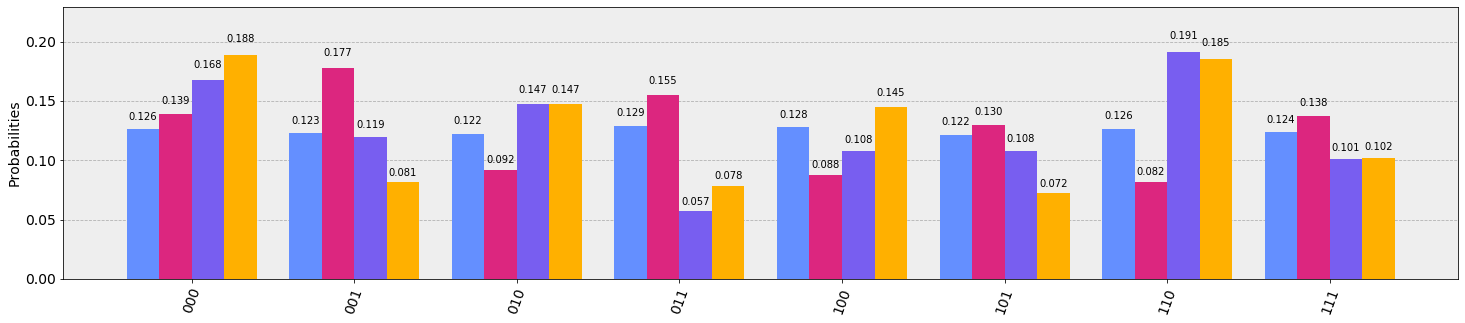

In [25]:
PLOT_HISTOGRAMS( [DADOS_01, DADOS_ibmqx21, DADOS_ibmq_ourense1, DADOS_ibmq_16_melbourne1] )

In [26]:
fig = plot_histogram( [DADOS_01, DADOS_ibmqx21, DADOS_ibmq_ourense1, DADOS_ibmq_16_melbourne1], bar_labels = False, color= ['blue','red','green','gray'], figsize = (10, 7) );
ax = fig.axes[0]
ax.patch.set_facecolor('white')
ax.patch.set_alpha(0.5)
ax.patch.set_edgecolor('black')
ax.set_ylabel('Probabilidades', fontsize=26)
ax.set_yticklabels([0.00, 0.05, 0.10, 0.15, 0.20], fontsize=20)
ax.set_xticklabels([r'$\left\vert000\right\rangle$', r'$\left\vert001\right\rangle$', r'$\left\vert010\right\rangle$', r'$\left\vert011\right\rangle$', r'$\left\vert100\right\rangle$', r'$\left\vert101\right\rangle$', r'$\left\vert110\right\rangle$', r'$\left\vert111\right\rangle$'], fontsize=20)
fig.savefig('Hist2_IBMQ_QC_QFT_3qubit.png')

In [27]:
# Definindo a Função que Calcula a QFT e a QFT Inversa
# de n = 2:
#-----------------------------------------------------
def QFT_QFT_INV(n = 2):
    from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
#------------------------------
    Q  = QuantumRegister(  n, name = 'j')
    C  = ClassicalRegister(n, name = 'c')
    QC = QuantumCircuit(Q, C, name = "QFT_QFT_INV")
#------------------------------
# QFT DIRETA
#------------------------------
    for i in range(0, n):
        m = n - 1 - i
        QC.h(Q[m])
        for j in range(m, 0, -1):
            k = 2 + m - j
            Rk(QC, Q[j-1], Q[m], k, 1.0)
        QC.barrier()
#------------------------------
# PORTA SWAP:
#------------------------------
    j = 0
    while ( int(n/2) > j ):
        QC.swap( Q[j], Q[n-1 - j] )
        j = j + 1
#------------------------------
# QFT INVERSA PARA n=2 QBITS:
#------------------------------
    QC.barrier()
#------------------------------
    QC.swap(Q[0], Q[1])
    QC.h(Q[0])
    Rk(QC, Q[0], Q[1], 2, -1.0)
    QC.h(Q[1])
#------------------------------
    QC.barrier()
    QC.measure(Q, C); print(' FUNCIONA')
#------------------------------
    return QC

 FUNCIONA


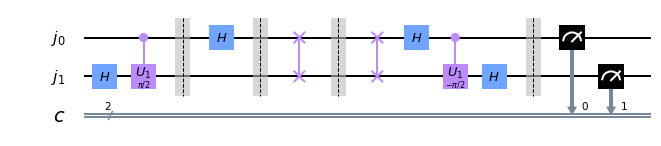

In [28]:
QC = QFT_QFT_INV()
display( QC.draw(output='mpl', scale = 0.60) )

In [29]:
# SIMULANDO
N_SHOTS = 2**(13)
BACKEND_NAME = "qasm_simulator"
DADOS = SIMULADOR_LOCAL(QC, N_SHOTS, BACKEND_NAME)

fig = plot_histogram( [DADOS], bar_labels = False, color='blue', figsize = (10, 6) )
ax = fig.axes[0]
ax.patch.set_facecolor('white')
ax.patch.set_alpha(0.5)
ax.patch.set_edgecolor('black')
ax.set_ylabel('Probabilidades', fontsize=26)
ax.set_yticklabels([0.00, 0.25, 0.50, 0.75, 1.00], fontsize=20)
ax.set_xticklabels([r'$\left\vert00\right\rangle$'], fontsize=20)
fig.savefig('Hist_QFT_QFT_INV_2qubit.png') 

 RESULTS:
   backend_name: qasm_simulator |   status: COMPLETED |   success: True
   get_counts(): {'00': 8192}
 ---------- FIM DA FUNCAO 'SIMULADOR_LOCAL()'---------- 


In [30]:
# Simulando remotamente
N_SHOTS = 2**(13);

BACKEND_NAME = "ibmqx2";              DADOS_ibmqx2 = SIMULADOR_REMOTO(QC, N_SHOTS, BACKEND_NAME);
BACKEND_NAME = "ibmq_ourense";        DADOS_ibmq_ourense = SIMULADOR_REMOTO(QC, N_SHOTS, BACKEND_NAME);
BACKEND_NAME = "ibmq_16_melbourne";   DADOS_ibmq_16_melbourne = SIMULADOR_REMOTO(QC, N_SHOTS, BACKEND_NAME);

fig = plot_histogram( [DADOS, DADOS_ibmqx2, DADOS_ibmq_ourense, DADOS_ibmq_16_melbourne], bar_labels = False, color= ['blue','red','green','gray'], figsize = (10, 7) );
ax = fig.axes[0]
ax.patch.set_facecolor('white')
ax.patch.set_alpha(0.5)
ax.patch.set_edgecolor('black')
ax.set_ylabel('Probabilidades', fontsize=26)
ax.set_yticklabels([0.00, 0.25, 0.50, 0.75, 1.00], fontsize=20)
ax.set_xticklabels([r'$\left\vert00\right\rangle$', r'$\left\vert01\right\rangle$', r'$\left\vert10\right\rangle$', r'$\left\vert11\right\rangle$' ], fontsize=20)
fig.savefig('Hist1_IBMQ_QFT_QFT_INV_2qubit.png') 

/home/warley/anaconda3/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:594: DeprecationWarning: IBMQ.get_backend() is being deprecated. Please use IBMQ.get_provider() to retrieve a provider and AccountProvider.get_backend("name") to retrieve a backend.
  DeprecationWarning)


Job Status: job has successfully run
 RESULTS:
   backend_name: ibmqx2 |   status: Successful completion |   success: True
   get_counts(): {'00': 6147, '11': 437, '10': 430, '01': 1178}
 ---------- FIM DA FUNCAO 'SIMULADOR_REMOTO()'---------- 


/home/warley/anaconda3/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:594: DeprecationWarning: IBMQ.get_backend() is being deprecated. Please use IBMQ.get_provider() to retrieve a provider and AccountProvider.get_backend("name") to retrieve a backend.
  DeprecationWarning)


Job Status: job has successfully run
 RESULTS:
   backend_name: ibmq_ourense |   status: Successful completion |   success: True
   get_counts(): {'00': 7190, '11': 152, '10': 297, '01': 553}
 ---------- FIM DA FUNCAO 'SIMULADOR_REMOTO()'---------- 


/home/warley/anaconda3/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:594: DeprecationWarning: IBMQ.get_backend() is being deprecated. Please use IBMQ.get_provider() to retrieve a provider and AccountProvider.get_backend("name") to retrieve a backend.
  DeprecationWarning)


Job Status: job has successfully run
 RESULTS:
   backend_name: ibmq_16_melbourne |   status: Successful completion |   success: True
   get_counts(): {'00': 6758, '11': 188, '10': 704, '01': 542}
 ---------- FIM DA FUNCAO 'SIMULADOR_REMOTO()'---------- 
